# Parcial 2 Sebastian Guayacan Mesa
## primer, tercer punto

In [14]:
from matplotlib import pyplot, pylab, mlab
from pylab import *
from scipy.optimize import linprog
import numpy as np
import math 
from math import factorial
from scipy.optimize import minimize
from matplotlib import cm
import sympy as sym
from itertools import combinations
import pandas as pd
import time
from IPython.display import display


/home/asus/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


<function matplotlib.pyplot.show(close=None, block=None)>

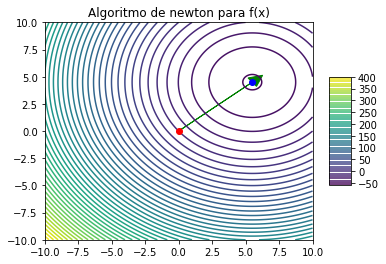

In [15]:
x1 = np.linspace(-10,10,500)
x2 = np.linspace(-10,10,500)
X1,Y1 = np.meshgrid(x1,x2)

# A1
plt.title("Algoritmo de newton para f(x)")
Z = X1**2 + Y1**2 - 11*X1 - 9*Y1
ax=plt.contour(X1,Y1,Z,50)
plt.colorbar(ax,shrink=0.5,aspect=5)
plt.xlim([-10,10])
plt.ylim([-10,10])
ax = plt.axes()
plt.plot(0,0, marker="o", color="red")
plt.plot(5.5,4.5, marker="o", color="blue")
ax.arrow( 0, 0, 5.5,4.5 ,color="g", head_width=1, head_length=1)
plt.show
 

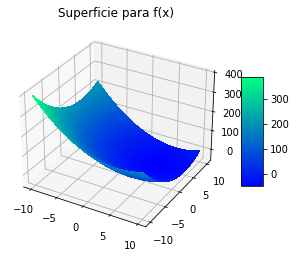

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
Z1 = Z.reshape(X1.shape)
surf= ax.plot_surface(X1, Y1, Z,cmap=cm.winter,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("Superficie para f(x)")
plt.show()

##  tercer punto

/home/asus/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<function matplotlib.pyplot.show(close=None, block=None)>

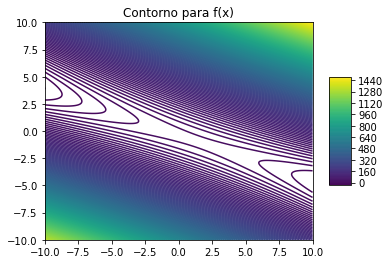

In [12]:
from os import minor


x1 = np.linspace(-10,10,500)
x2 = np.linspace(-10,10,500)
X1,Y1 = np.meshgrid(x1,x2)

# A1
plt.title("Contorno para f(x)")
Z = X1**2 + 7*Y1**2 + 6*X1*Y1 + 3*X1 + 5*Y1 +6
ax=plt.contour(X1,Y1,Z,250)
plt.colorbar(ax,shrink=0.5,aspect=5)

ax = plt.axes()
#plt.plot(0,0, marker="o", color="red")
#plt.plot(1.5,-1, marker="o", color="blue")
#ax.arrow( 0,0, +1.5,-1 ,color="g", head_width=0.4, head_length=0.4)
plt.show


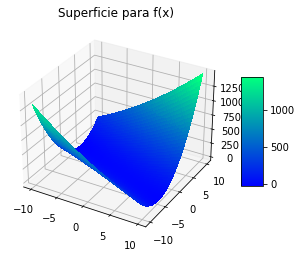

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
Z1 = Z.reshape(X1.shape)
surf= ax.plot_surface(X1, Y1, Z,cmap=cm.winter,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("Superficie para f(x)")
plt.show()

## punto 4

In [23]:
def gradiente(f, x):
    """ Calcula el gradiente de una función f(x1,x2,...)"""
    n = len(x)
    nabla = zeros(n,1)
    for i in range(n):
        nabla[i] = f.diff(x[i])
    return nabla
def s(gr,hs,lo):
    m = -(hs-lo*np.eye(2))
    m = np.array([[float(m[0]),float(m[1])],[float(m[2]),float(m[3])]])
    s = np.array(linalg.inv(m)*gr)
    #s = linalg.inv(m)*gr
    return s
def paso1(xo) :
    G = gradiente(f, (x1,x2))
    H = hessian(f, (x1,x2))
    gr = G.subs({"x1":xo[0][0],"x2":xo[1][0]})
    hs = H.subs({"x1":xo[0][0],"x2":xo[1][0]})
    return (gr,hs)
def paso3 (gr,hs,lo,xo):
    sx = s(gr,hs,lo)
    
    xo = xo - sx
    return xo

In [24]:
x1,x2 = sym.symbols("x1,x2")
f = (1-x1)**2 + 5*(x2-x1**2)**2 
xo = np.array([[6],[9]])
#xo = np.array([[0],[0]])
xaux = xo
M = 20
ep = 0.01
lo=100000
k = 0
(gr,hs) = paso1(xo)
paso = 1
flag = False
lis = []

TypeError: Cannot interpret '1' as a data type

In [25]:
while flag == True:
    mg = math.sqrt((gr[0])**2 + (gr[1])**2 )
    if( mg <= ep) or  k >= M:
        flag = False
    else :
        lis.append(xaux)
        if paso == 1:
            (gr,hs) = paso1(xaux)
            
            paso = 3
            
        if paso == 3:
            xaux = xo
            xo = paso3 (gr,hs,lo,xaux)
            #print (f"k {xaux} k+1 {xo}")
            fx = f.subs({"x1":xo[0][0],"x2":xo[1][0]})
            fuax = f.subs({"x1":xaux[0][0],"x2":xaux[1][0]})
            if fx < fuax:
                lo = 0.5*lo
                
                k = k+1
                paso = 1
                
            else: 
                lo = 2*lo
                
                paso = 3
                
    print (f"  k {xaux} k+1 {xo} valor k+1 {fx} valor k {fuax}")

    
    


/home/asus/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


<function matplotlib.pyplot.show(close=None, block=None)>

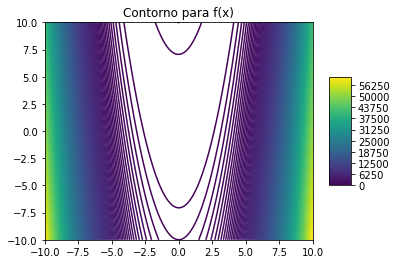

In [19]:
x1 = np.linspace(-10,10,500)
x2 = np.linspace(-10,10,500)
X1,Y1 = np.meshgrid(x1,x2)

# A1
plt.title("Contorno para f(x)")
Z =(1-X1)**2 + 5*(Y1-X1**2)**2 
ax=plt.contour(X1,Y1,Z,250)
plt.colorbar(ax,shrink=0.5,aspect=5)
#plt.xlim([1,2])
#plt.ylim([2,3])
ax = plt.axes()
#plt.plot(0,0, marker="o", color="red")
#plt.plot(1.5,-1, marker="o", color="blue")
#ax.arrow( 0,0, +1.5,-1 ,color="g", head_width=0.4, head_length=0.4)
plt.show

In [18]:
f = (1-x1)**2 + 5*(x2-x1**2)**2 

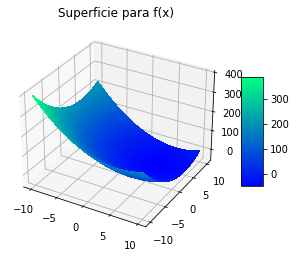

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
Z1 = Z.reshape(X1.shape)
surf= ax.plot_surface(X1, Y1, Z,cmap=cm.winter,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("Superficie para f(x)")
plt.show()